In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
data = pd.read_csv('kc_house_data.csv')
print(data.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [12]:
data = data.drop(['id', 'date'], axis = 1)

In [13]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
y = data.iloc[:, 0]
X = data.iloc[:, 1:]

In [25]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [27]:
# Creating Linear Regression model
lr = LinearRegression()

In [28]:
lr.fit(x_train, y_train)

LinearRegression()

In [29]:
# Seeing the parameters
c = lr.intercept_
m = lr.coef_
print(f"y-intercept = {c} and coefficients = {m}")

y-intercept = 1964128.4690995226 and coefficients = [-3.11939329e+04  3.70363974e+04  1.06476642e+02  2.38758250e-01
  1.20271512e+04  5.91514062e+05  5.34921730e+04  2.65777968e+04
  9.57187257e+04  6.48366245e+01  4.16400181e+01 -2.58198268e+03
  1.60385305e+01 -5.25167021e+02  6.06436791e+05 -2.05321911e+05
  2.88419413e+01 -4.77594186e-01]


In [30]:
# Predicting from the training data
y_pred_train = lr.predict(x_train)

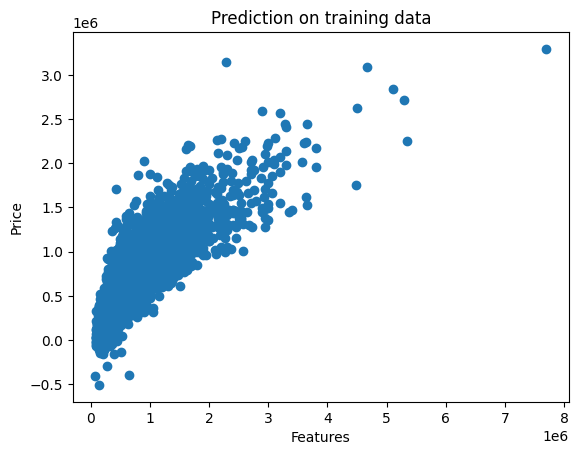

In [34]:
# plotting a graph to check how good the predicted values are
plt.scatter(y_train, y_pred_train)

# Title of graph
plt.title('Prediction on training data')
# X-label
plt.xlabel('Features')
# Y-label
plt.ylabel('Price')
plt.show()

In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
r2_score(y_train, y_pred_train)

0.7044808067489786

# Now predicting in the testing dataset

In [36]:
y_pred_test = lr.predict(x_test)

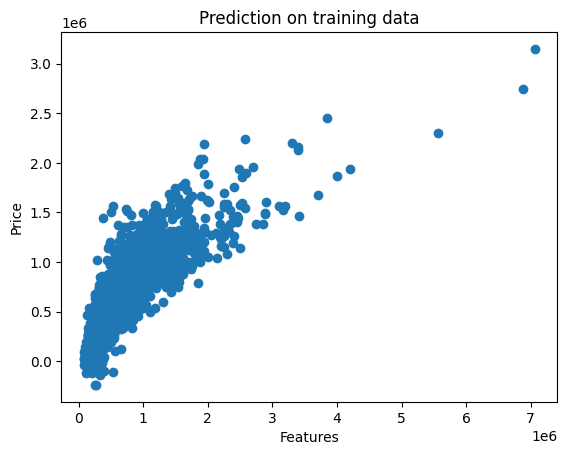

In [38]:
# plotting a graph to check how good the predicted values are
plt.scatter(y_test, y_pred_test)

# Title of graph
plt.title('Prediction on training data')
# X-label
plt.xlabel('Features')
# Y-label
plt.ylabel('Price')
plt.show()

In [39]:
r2_score(y_test, y_pred_test)

0.687790289929965

In [44]:
mean_absolute_error(y_test, y_pred_test)

124034.75533299844

In [45]:
root_mean_squared_error(y_test, y_pred_test)

207035.93991250833